# Milestone 2 

# Additional Data Processing

### Research Question: Predicting Air Quality Index

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv('AQI.csv')

In [4]:
df['State Name'].value_counts()

California              26290
Texas                   14555
Florida                 10038
Ohio                     9776
Arizona                  8969
Indiana                  8892
Illinois                 7240
Pennsylvania             6776
New York                 6727
Colorado                 6454
North Carolina           6091
Louisiana                5890
Wisconsin                4891
Utah                     4529
Missouri                 4521
New Jersey               4224
Nevada                   4044
Iowa                     4013
Georgia                  3904
Tennessee                3431
Michigan                 3351
Maryland                 3323
Oklahoma                 3213
New Mexico               3118
Massachusetts            2826
Virginia                 2771
Alabama                  2485
South Carolina           2475
Kentucky                 2373
Wyoming                  2100
Washington               2001
Mississippi              1982
Minnesota                1876
Maine     

[]

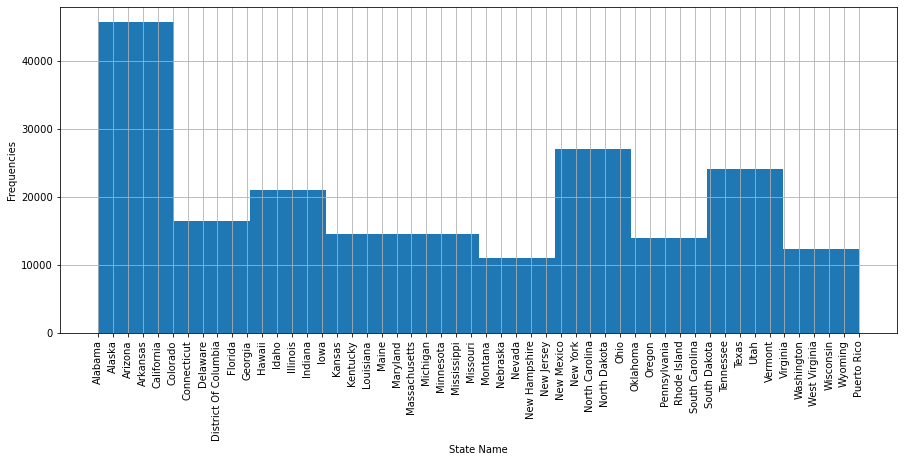

In [5]:
# Visualising the frequency of States

plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df['State Name'].hist()
plt.xlabel('State Name')
plt.ylabel('Frequencies')
plt.plot()

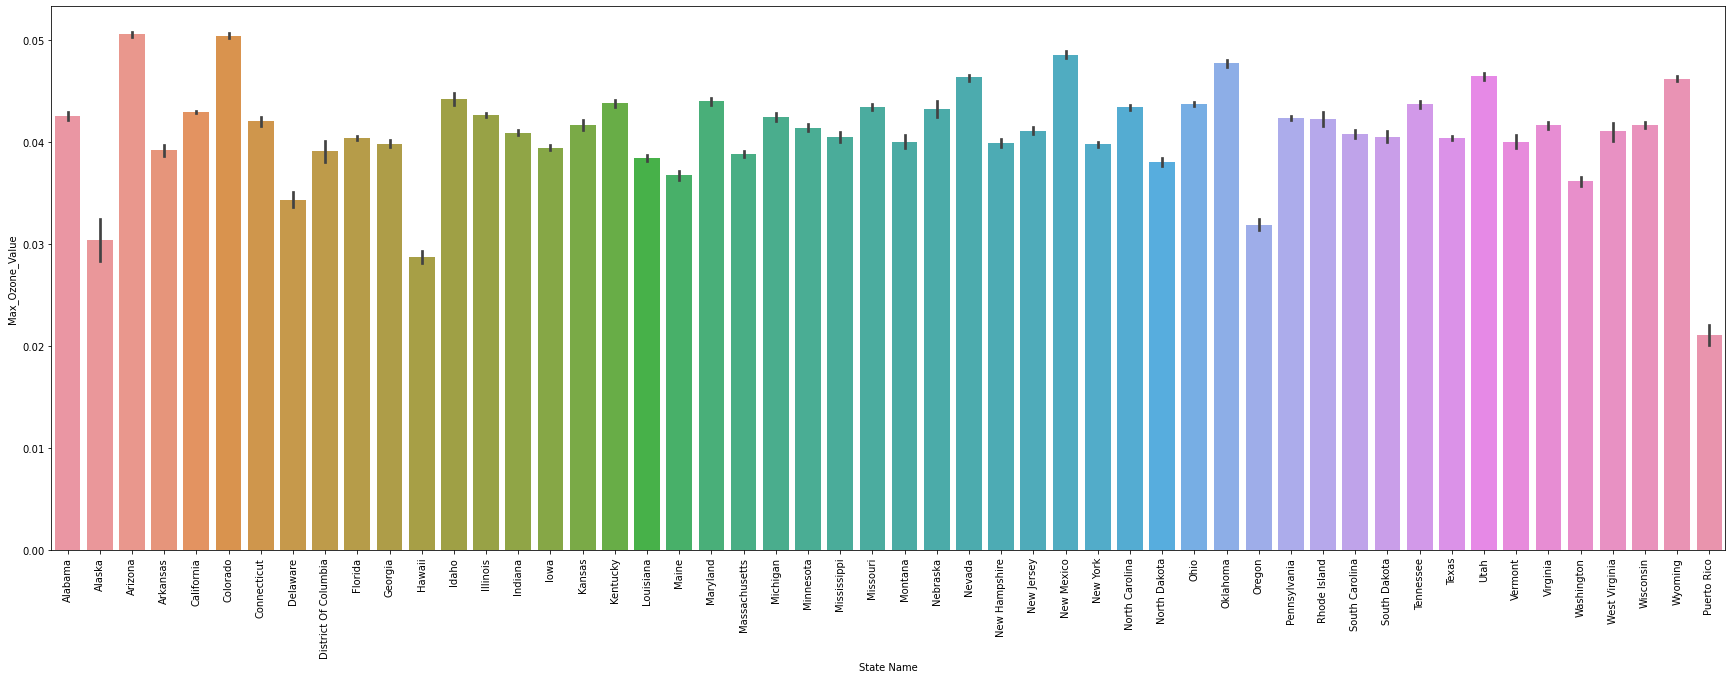

In [6]:
#Visualizing the states with maximun Ozone Value

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x=df['State Name'],y= df['Max_Ozone_Value'], data = df);

In [7]:
plt.rcParams['figure.figsize']=(30,10)

<AxesSubplot:xlabel='State Name'>

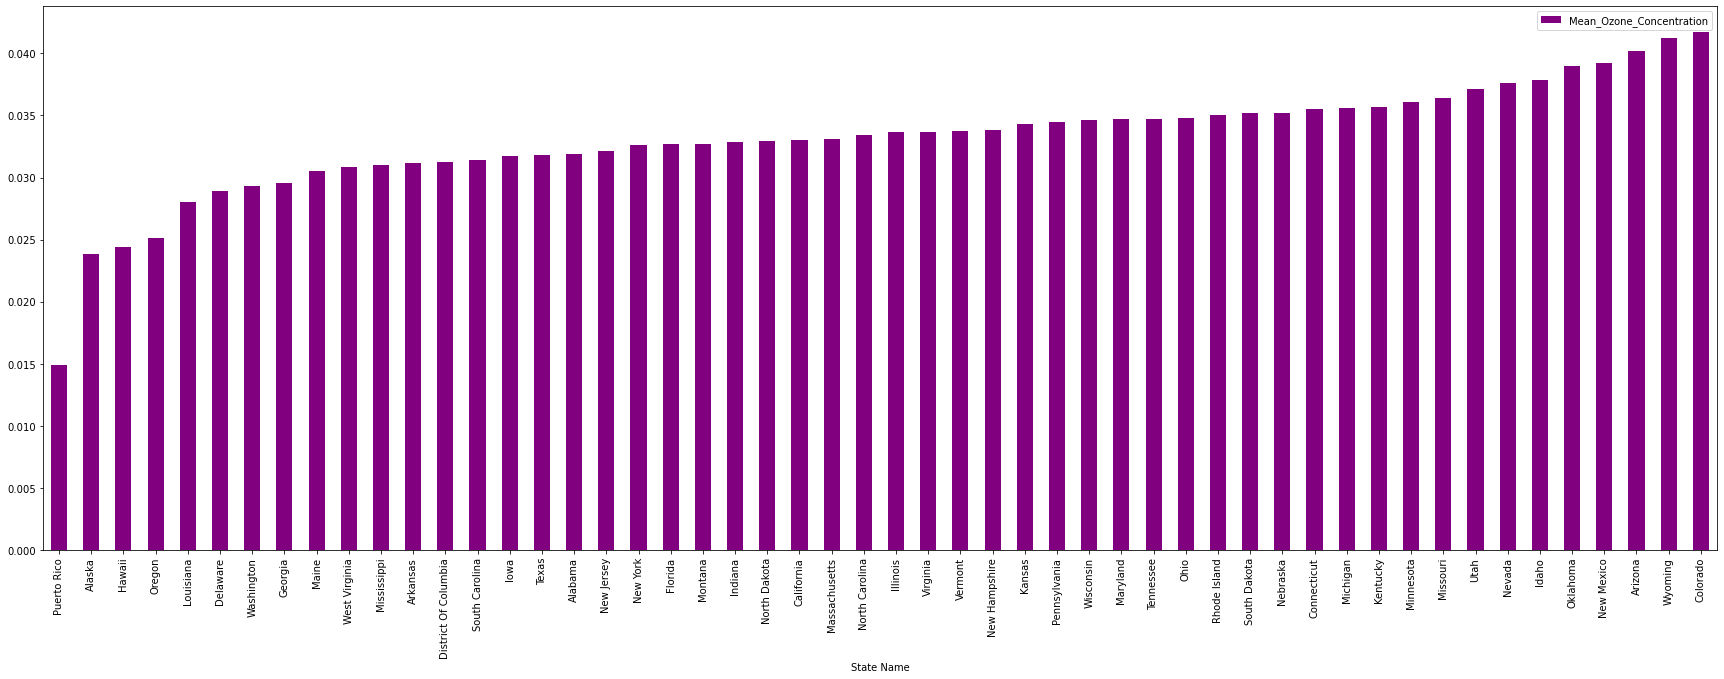

In [8]:
# Visulaizing the States with Ozone Concentration
df[['Mean_Ozone_Concentration','State Name']].groupby(["State Name"]).mean().sort_values(by='Mean_Ozone_Concentration').plot.bar(color='purple')

In [9]:
# Splitting the dates to Month, Day, Year

df['Date Local'] = pd.to_datetime(df['Date Local'])
df['Year'] = df['Date Local'].dt.year
df['Month'] = df['Date Local'].dt.month
df['Day'] = df['Date Local'].dt.day

In [10]:
# Creating a new column for AQI Range which can be used in Logistic regression
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['Air_Quality_Index'] .apply(AQI_Range)

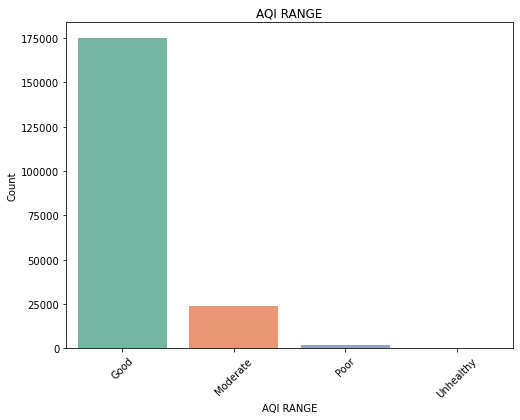

In [11]:
# Visualising to see the frequencies of AQI Range
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AQI_Range', palette='Set2')
plt.title('AQI RANGE')
plt.xlabel('AQI RANGE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


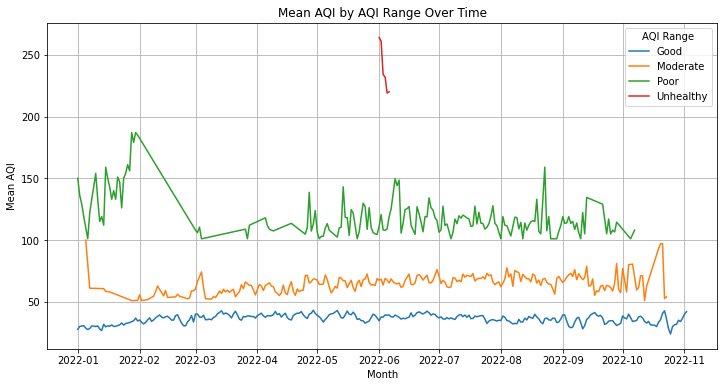

In [12]:
# Time series plot to compare different AQI range

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date Local', y='Air_Quality_Index', hue='AQI_Range', ci=None)
plt.title('Mean AQI by AQI Range Over Time')
plt.xlabel('Month')
plt.ylabel('Mean AQI')
plt.legend(title='AQI Range')
plt.grid(True)
plt.show()

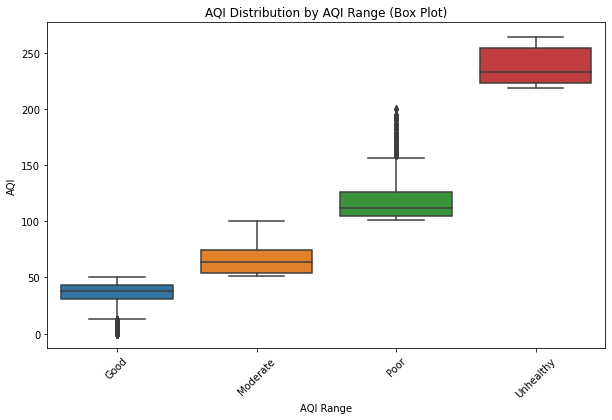

In [13]:
#Box plot for visualising AQI Distribution by AQI Range

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI_Range', y='Air_Quality_Index')
plt.title('AQI Distribution by AQI Range (Box Plot)')
plt.xlabel('AQI Range')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

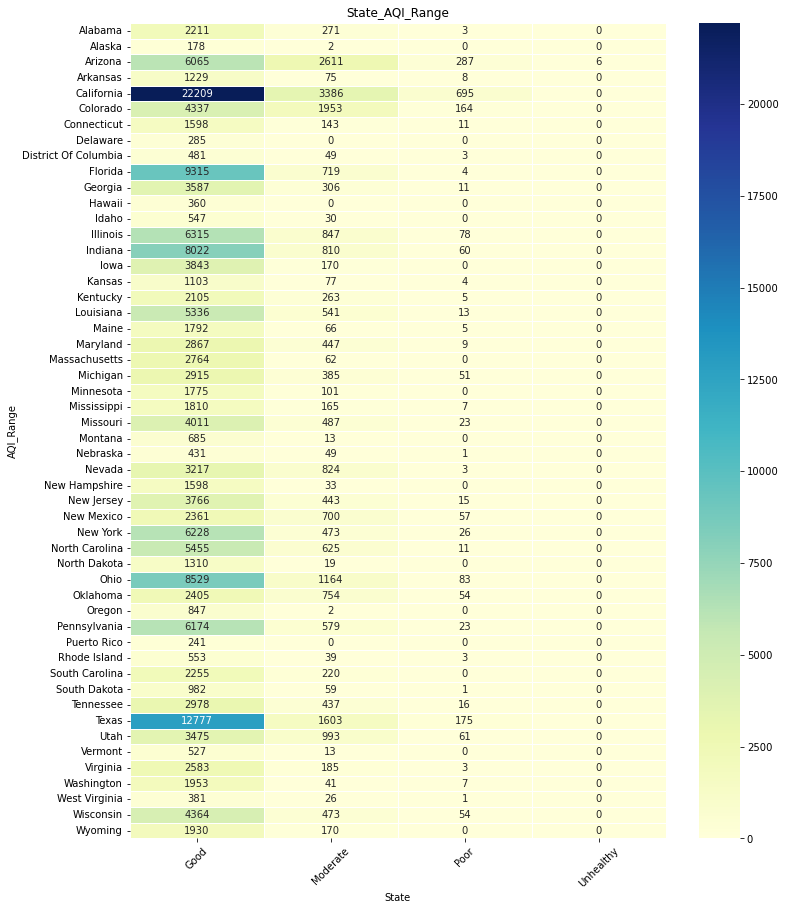

In [14]:
# Couning the frequency of each delivery status for each shipping mode
State_AQIRange = pd.crosstab(df['State Name'], df['AQI_Range'])

# bar plot to visualize the distribution
plt.figure(figsize=(12, 15))
sns.heatmap(State_AQIRange, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('State_AQI_Range')
plt.xlabel('State')
plt.ylabel('AQI_Range')
plt.xticks(rotation=45)
plt.show()

# Data Preperation for Modeling

In [15]:
# Drop the specified columns since these columns are not that useful for the research question
columns_to_drop = ['Datum', 'Parameter Name','Observation Percent','Year', 'Local Site Name','Address','CBSA Name','Date of Last Change']
df1 = df.drop(columns=columns_to_drop, axis=1)

In [16]:
# Reordering the column for better understanding

column_order = [
    'Latitude', 'Longitude', 'POC','State Name', 'County Name', 'City Name', 'Date Local', 'Month', 'Day',
    'Event Type', 'Observation Count', 'Mean_Ozone_Concentration', 'Max_Ozone_Value', 'Hour_Max_Ozone_Concentration',
    'Air_Quality_Index', 'AQI_Range'
]

df1 = df1[column_order]

In [17]:
df1.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Good
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Good
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Moderate
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Good
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Moderate


In [18]:
df1


,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Good
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Good
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Moderate
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Good
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201004,18.216038,-67.144107,1,Puerto Rico,Mayagnez,Mayaguez,2022-06-26,6,26,None,17,0.007000,0.013,9.0,12,Good
201005,18.216038,-67.144107,1,Puerto Rico,Mayagnez,Mayaguez,2022-06-27,6,27,None,17,0.011471,0.018,11.0,17,Good
201006,18.216038,-67.144107,1,Puerto Rico,Mayagnez,Mayaguez,2022-06-28,6,28,None,17,0.008412,0.016,8.0,15,Good
201007,18.216038,-67.144107,1,Puerto Rico,Mayagnez,Mayaguez,2022-06-29,6,29,None,17,0.010412,0.017,10.0,16,Good
